## Importing Dependencies

In [8]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post9-py3-none-any.whl
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/tf/98dxj1b15ys366q5nv4rmfxh0000gn/T/pip-install-ee1dafro/tensorflow-gpu_7ce091a3aecf434c83c76fc1d4683117/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFl

  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml-based projects

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [9]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [10]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [11]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [12]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [13]:
df.iloc[1]['comment_text']

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

## 1.PreProcessing Data

In [14]:
!pip list

Package                                           Version
------------------------------------------------- --------------------
absl-py                                           1.4.0
aiofiles                                          23.2.1
alabaster                                         0.7.12
altair                                            5.0.1
anaconda-client                                   1.11.0
anaconda-navigator                                2.3.1
anaconda-project                                  0.11.1
annotated-types                                   0.5.0
anyio                                             3.7.1
appdirs                                           1.4.4
applaunchservices                                 0.3.0
appnope                                           0.1.2
appscript                                         1.1.2
argon2-cffi                                       21.3.0
argon2-cffi-bindings                              21.2.0
arrow                    

lazy_loader                                       0.2
lazy-object-proxy                                 1.6.0
libarchive-c                                      2.9
libclang                                          16.0.6
librosa                                           0.6.0
llvmlite                                          0.38.0
locket                                            1.0.0
lxml                                              4.9.1
lz4                                               3.1.3
Markdown                                          3.3.4
markdown-it-py                                    3.0.0
MarkupSafe                                        2.0.1
matplotlib                                        3.5.2
matplotlib-inline                                 0.1.6
mccabe                                            0.7.0
mdurl                                             0.1.2
mediapipe                                         0.9.1.0
mistune                                         

pyobjc-framework-PhotosUI                         9.0.1
pyobjc-framework-PreferencePanes                  9.0.1
pyobjc-framework-PushKit                          9.0.1
pyobjc-framework-Quartz                           9.0.1
pyobjc-framework-QuickLookThumbnailing            9.0.1
pyobjc-framework-ReplayKit                        9.0.1
pyobjc-framework-SafariServices                   9.0.1
pyobjc-framework-SceneKit                         9.0.1
pyobjc-framework-ScreenCaptureKit                 9.0.1
pyobjc-framework-ScreenSaver                      9.0.1
pyobjc-framework-ScreenTime                       9.0.1
pyobjc-framework-ScriptingBridge                  9.0.1
pyobjc-framework-SearchKit                        9.0.1
pyobjc-framework-Security                         9.0.1
pyobjc-framework-SecurityFoundation               9.0.1
pyobjc-framework-SecurityInterface                9.0.1
pyobjc-framework-ServiceManagement                9.0.1
pyobjc-framework-ShazamKit                      

In [15]:
from tensorflow.keras.layers import TextVectorization

In [16]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [17]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [18]:
y #Labels

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [19]:
MAX_FEATURES = 200000 # number of words in the vocab

In [20]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [21]:
vectorizer.adapt(X.values)

In [22]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [23]:
vectorized_text = vectorizer(X.values)

In [24]:
vectorized_text#159571

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [25]:
len(X.values)#159571

159571

In [26]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [27]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

## 2.Create Sequential Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [29]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [30]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [ ]:
history = model.fit(train, epochs=1, validation_data=val)

In [33]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

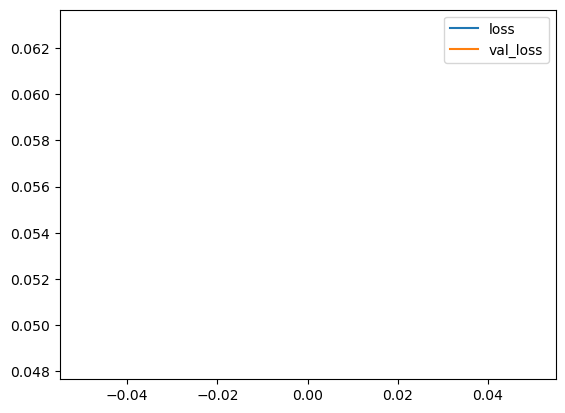

In [34]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3.Make Predictions

In [35]:

input_text = vectorizer('You freaking suck! I am going to hit you.')

In [36]:
res = model.predict(np.array([input_text]))

1/1 [==============================] - 1s 1s/step


In [37]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [38]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [39]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 321ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [40]:
res.shape

(1, 6)

# 4. Evaluate Model

In [41]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [42]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [43]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 136ms/step


1/1 [==============================] - 0s 146ms/step


1/1 [==============================] - 0s 135ms/step


1/1 [==============================] - 0s 137ms/step


1/1 [==============================] - 0s 159ms/step


1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 166ms/step


In [44]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8569225072860718, Recall:0.6296401023864746, Accuracy:0.4874624013900757


# 5. Test and Gradio

In [45]:
!pip install gradio jinja2


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [46]:
import tensorflow as tf
import gradio as gr

In [47]:
model.save('toxicity.h5')

/Users/raghul_raj_kumarr/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
model = tf.keras.models.load_model('toxicity.h5')

In [49]:
input_str = vectorizer('hey i freaken hate you!')

In [50]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 2s 2s/step


In [51]:
res

array([[0.7282741 , 0.0110487 , 0.2423436 , 0.02845062, 0.3178785 ,
        0.05474474]], dtype=float32)

In [52]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [53]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

/var/folders/tf/98dxj1b15ys366q5nv4rmfxh0000gn/T/ipykernel_1614/2358991581.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
/var/folders/tf/98dxj1b15ys366q5nv4rmfxh0000gn/T/ipykernel_1614/2358991581.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
/var/folders/tf/98dxj1b15ys366q5nv4rmfxh0000gn/T/ipykernel_1614/2358991581.py:2: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),


In [54]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://5c0d7471155ead12d9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
